# Metody statystyczne zestaw 1 
## Autor Paweł Jelonek

### Problem A1

### a) Implementacja generatora liczb losowych z rozkładu normalnego $ N(\mu, \sigma^2)$ metodą Polarną:
### $\mu$ = 0 - wartość oczekiwana; 
### $\sigma^2$ = 1 - wariancja; 


In [1]:
from numpy import random, sqrt, log, sin, cos, pi, linspace, cumsum
from matplotlib import pyplot as plt

In [2]:
def polar_method(n = 1):
    x1 = random.rand(n)
    x2 = random.rand(n)
    
    r = sqrt(-2 * log(x1))
    y1 = r*cos(2 * pi * x2)
    y2 = r*sin(2 * pi * x2)
    
    return y1, y2

### b) Narysowanie histogramu i porównianie ze wzorem analitycznym

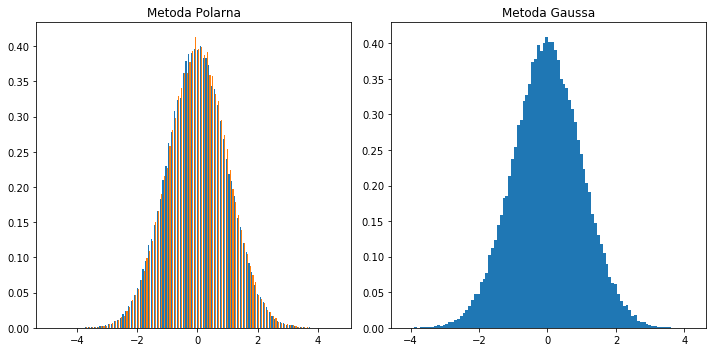

In [3]:
size = 100000
bins = 100

fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].hist(polar_method(size), density=True, bins=bins)
axs[0].title.set_text('Metoda Polarna')
axs[1].hist(random.normal(size=size), density=True, bins=bins)
axs[1].title.set_text('Metoda Gaussa')
plt.show()

### c) Obliczyć eksperymentalne znaczenia dla wartości średniej oraz wariancji

### Problem B
### Ruina gracza dla 2 graczy A,B

In [4]:
def players_ruin(p1_balance, p2_balance, prob, games, bet = 2):
    p1_win_sum = 0
    
    for game in range(games):
        p1_balance_in_game = p1_balance
        p2_balance_in_game = p2_balance

        while p1_balance_in_game > 0 and p2_balance_in_game > 0:
            p1_win = random.uniform(0, 1) < prob
            if p1_win:
                p1_balance_in_game = p1_balance_in_game + bet
                p2_balance_in_game = p2_balance_in_game - bet
            else:
                p1_balance_in_game = p1_balance_in_game - bet
                p2_balance_in_game = p2_balance_in_game + bet

        if p1_balance_in_game > 0:
            p1_win_sum += 1
        
    return p1_win_sum

### Kapitały początkowe A,B:
### a = 50; b=50;

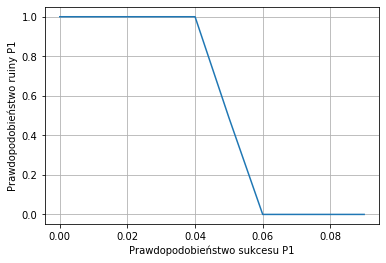

In [5]:
games = 100

x = []
y = []

for prob in range(0, 10, 1):
    p1_wins = players_ruin(50, 50, prob/10, games, 1)
    x.append(prob/100)
    y.append(1 - p1_wins/games)
plt.plot(x, y)

plt.rcParams["figure.figsize"]=(20, 10)
plt.xlabel('Prawdopodobieństwo sukcesu P1')
plt.ylabel('Prawdopodobieństwo ruiny P1')
plt.grid()
plt.show()

Porównanie z wynikiem analitycznym dla różnych $P_A$

In [6]:
def analitical_players_ruin(a, z, prob):
    if prob is 0.5:
        return 1 - a/z
    
    x = ( 1 - prob ) / prob
    y1 = 1 - x**a
    y2 = 1 - x**z
    return y1 / y2

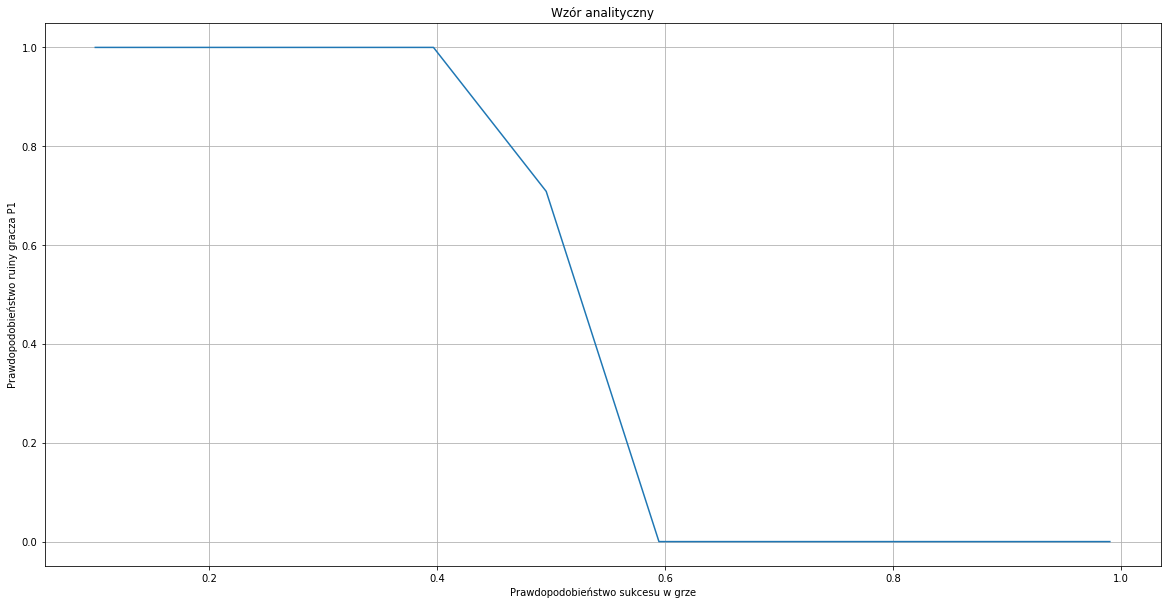

In [7]:
p1_lost = []
x = []

for i in linspace(0.1, 0.99, 10):
    p2_lost = analitical_players_ruin(50, 100, i)
    p1_lost.append( 1 - p2_lost)
    x.append(i)

plt.plot(x, p1_lost)
plt.grid()
plt.title('Wzór analityczny')
plt.xlabel('Prawdopodobieństwo sukcesu w grze')
plt.ylabel('Prawdopodobieństwo ruiny gracza P1')

plt.show()

### Problem C
### Ruina gracza dla 2 graczy A, B
### $a + b = 100, P_A = 1/2$

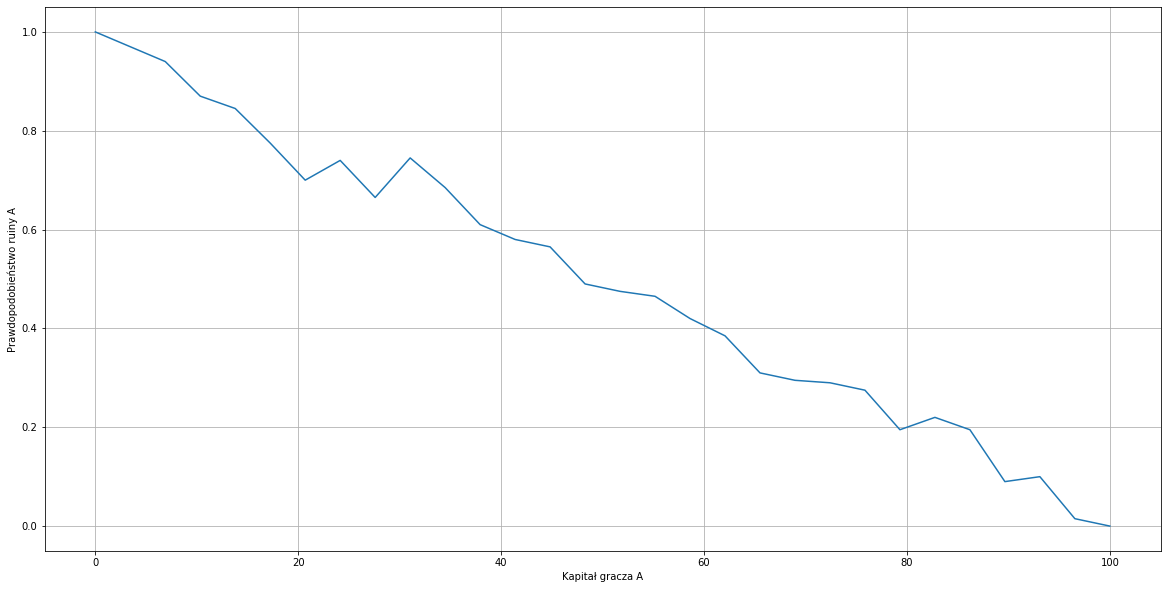

In [8]:
games = 200

x = []
y = []

for i in linspace(0, 100, 30):
    p1_wins = players_ruin(i, 100 - i, 0.5, games, 5)
    x.append(i)
    y.append(1 - p1_wins/games)

plt.plot(x, y)

plt.grid()
plt.xlabel('Kapitał gracza A')
plt.ylabel('Prawdopodobieństwo ruiny A')

plt.show()

### Porównanie wyniku z teorią

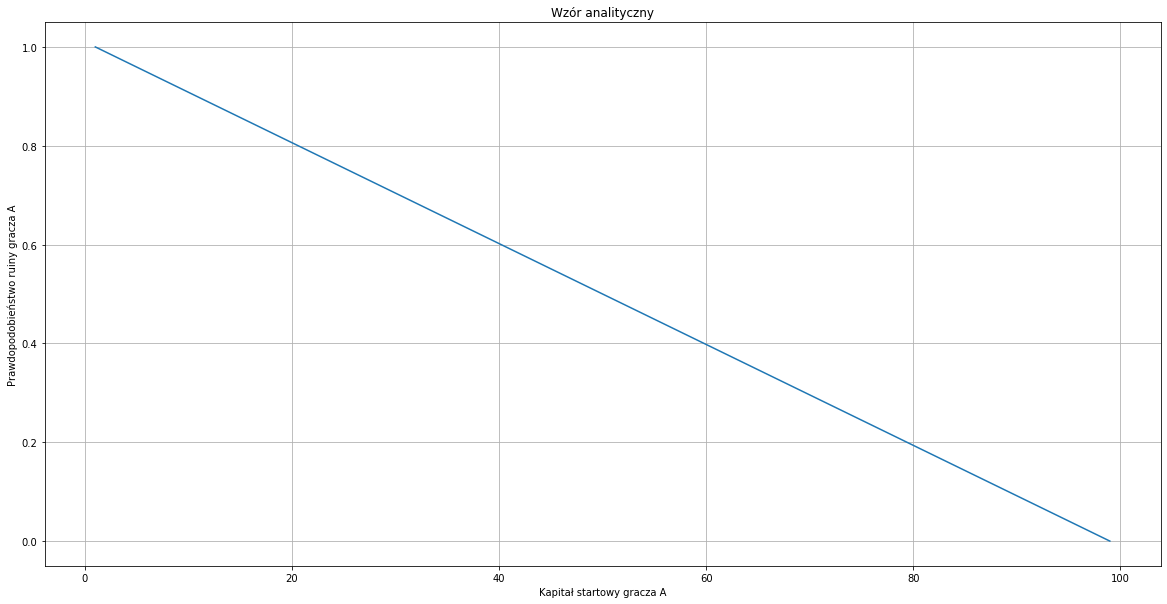

In [9]:
n_simulations = 5
p2_ruined = []
whole_balance = 100
steps = 99
for i in linspace(0, whole_balance, steps):
    p2_lost = 1 - i/whole_balance
    p2_ruined.append(p2_lost)
    
plt.plot(linspace(1, 99, steps), p2_ruined)
plt.grid()
plt.title('Wzór analityczny')
plt.xlabel('Kapitał startowy gracza A')
plt.ylabel('Prawdopodobieństwo ruiny gracza A')

plt.show()

### Problem D
### Liczba rozgrywek do ukonczenia gry - L
### Wyliczyc srednia dlugosc rozgrywki
### $Pa$ = $1/2$, $1/5$, $4/5$; $a = b = 50;$ calkowita liczba gier = $20000$ 

In [10]:
def players_ruin_with_counter(games, p1_balance, p2_balance, prob, bet = 1):
    p1_wins = [0] * games
    counter = [0] * games
    
    for i in range(games):
        p1_current_balance = p1_balance
        p2_current_balance = p2_balance

        while p1_current_balance > 0 and p2_current_balance > 0:
            counter[i] += 1
            
            p1_win = random.uniform(0, 1) < prob
            p1_wins[i] += p1_win
            
            if p1_win:
                p1_current_balance = p1_current_balance + bet
                p2_current_balance = p2_current_balance - bet
            else:
                p1_current_balance = p1_current_balance - bet
                p2_current_balance = p2_current_balance + bet
        
    return p1_wins, counter

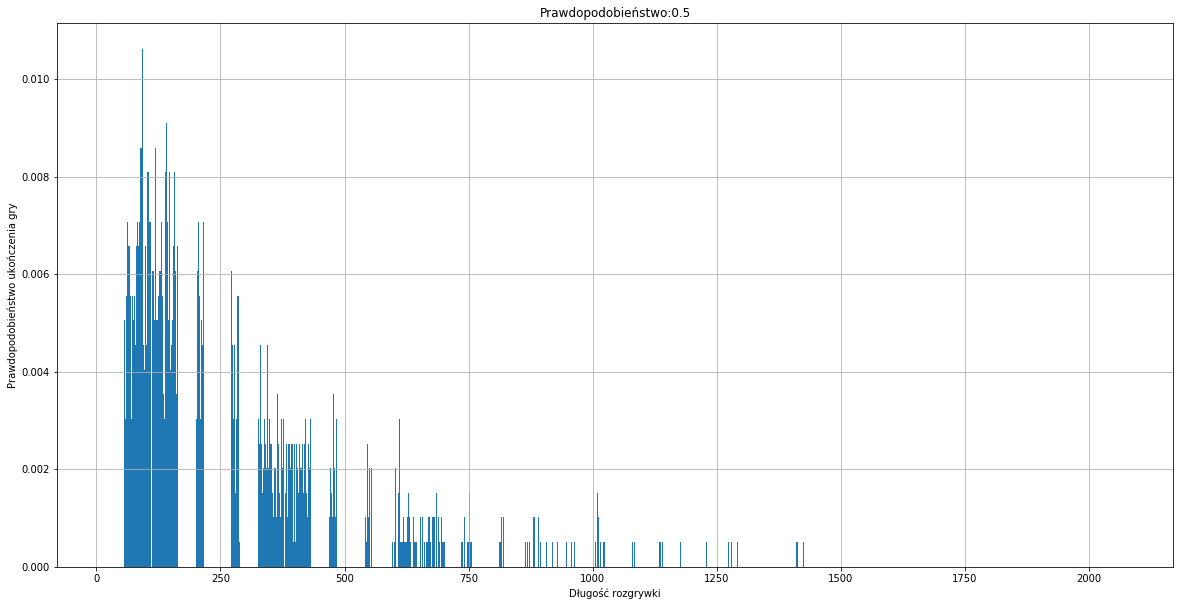

Średnia długość rozgrywki: 296.881
Średnia długość rozgrywki: 28.742
Średnia długość rozgrywki: 28.344


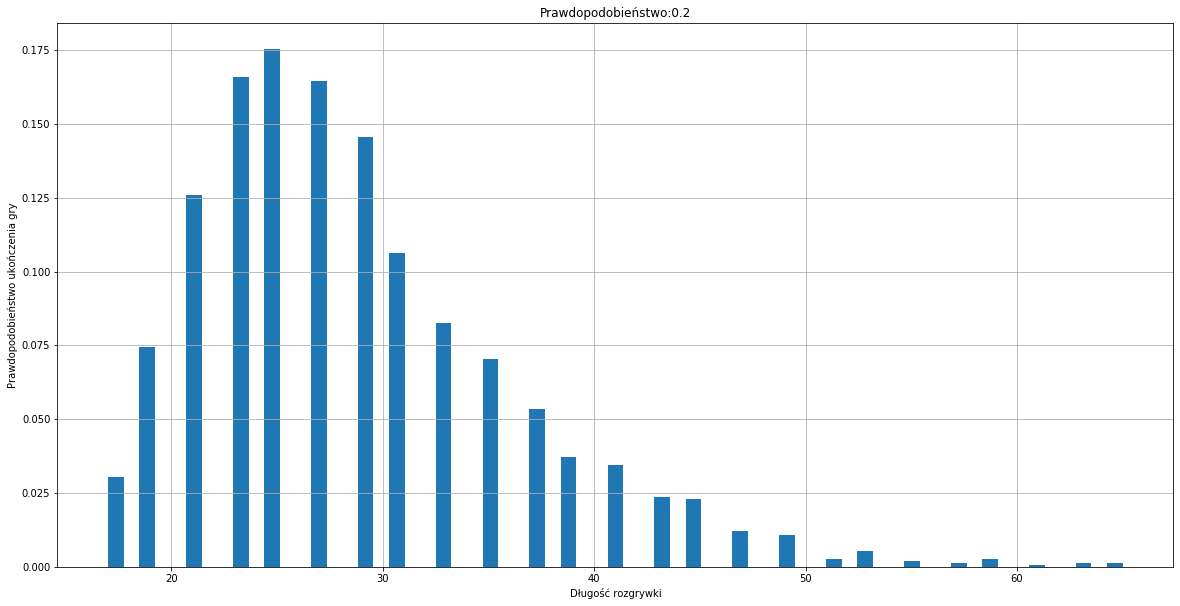

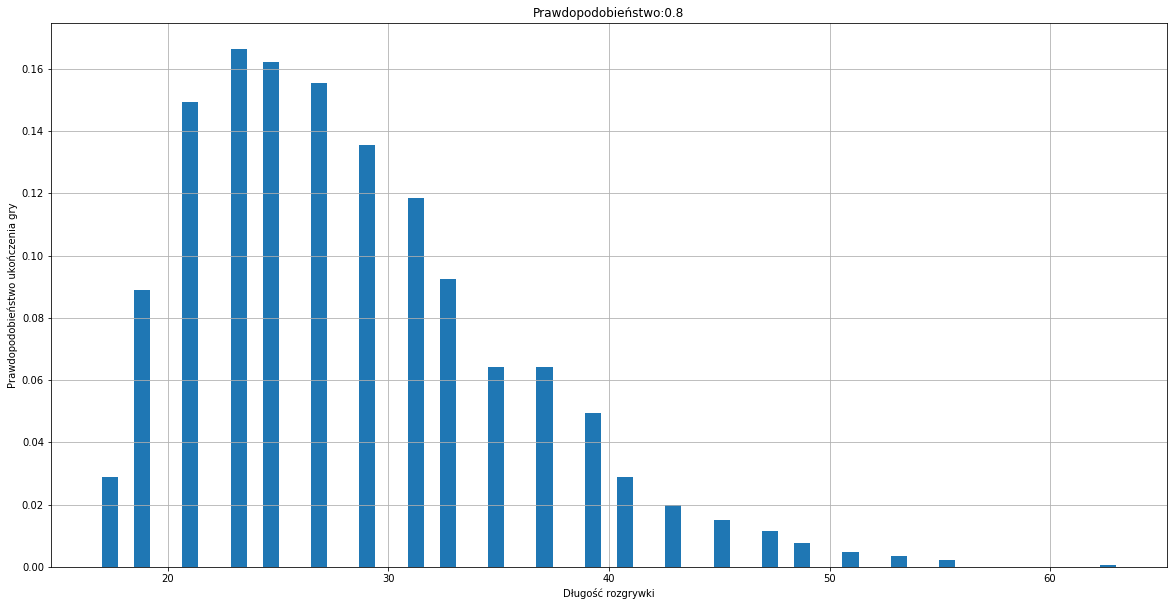

In [11]:
prob = (0.5, 0.2, 0.8)
games = 2000

for i in prob:
    p1_wins, counter = players_ruin_with_counter(games, 50, 50, i, 3)    
    plt.hist(counter, density=True, bins=max(counter))
    plt.grid()
    plt.title('Prawdopodobieństwo:' + str(i))
    plt.xlabel('Długość rozgrywki')
    plt.ylabel('Prawdopodobieństwo ukończenia gry')
    plt.rcParams["figure.figsize"]=(20, 10)
    plt.show()
    print(f'Średnia długość rozgrywki: {sum(counter)/games}')

## Problem G
### Trajektoria liczby wygranych dla 1 z 2 graczy
### dla kilku gier(do 10) dla różnych wartości 
### $Pa: 1/2, 1/5, 4/5 $

In [12]:
def players_ruin_with_wins(p1_balance, p2_balance, prob, games, bet = 1):
    p1_wins = [False] * games
    counter = [0] * games
    
    for i in range(games):
        p1_current_balance = p1_balance
        p2_current_balance = p2_balance

        while p1_current_balance > 0 and p2_current_balance > 0:
            p1_win = random.uniform(0, 1) < prob
            if p1_win:
                p1_current_balance = p1_current_balance + bet
                p2_current_balance = p2_current_balance - bet
            else:
                p1_current_balance = p1_current_balance - bet
                p2_current_balance = p2_current_balance + bet         
            counter[i] += 1
     
        p1_wins[i] = p1_current_balance > 0
        
    return p1_wins, counter

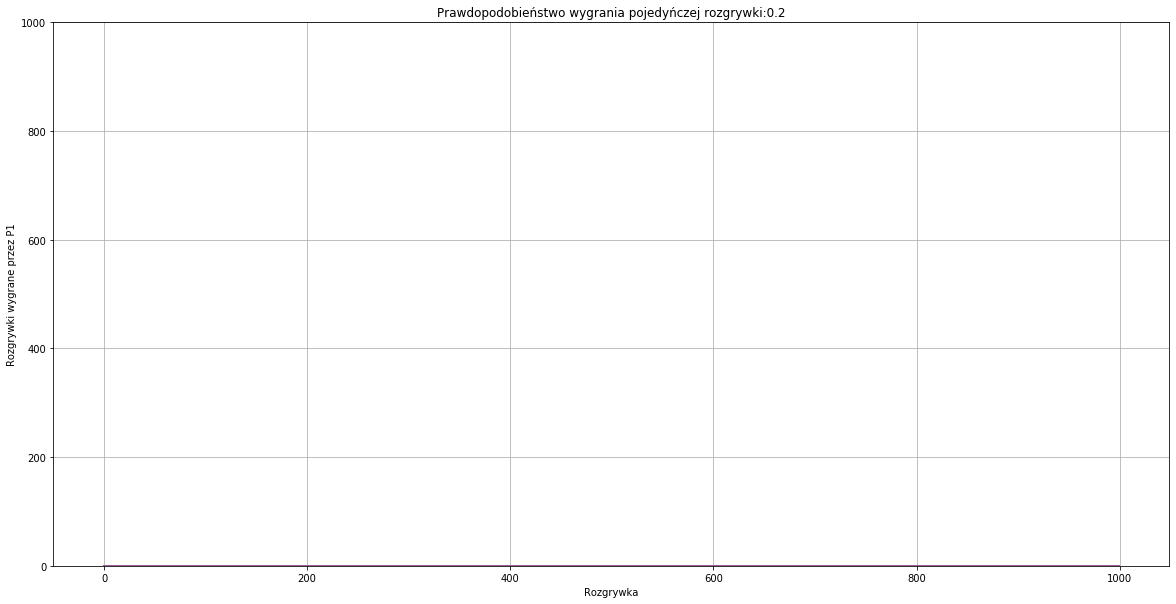

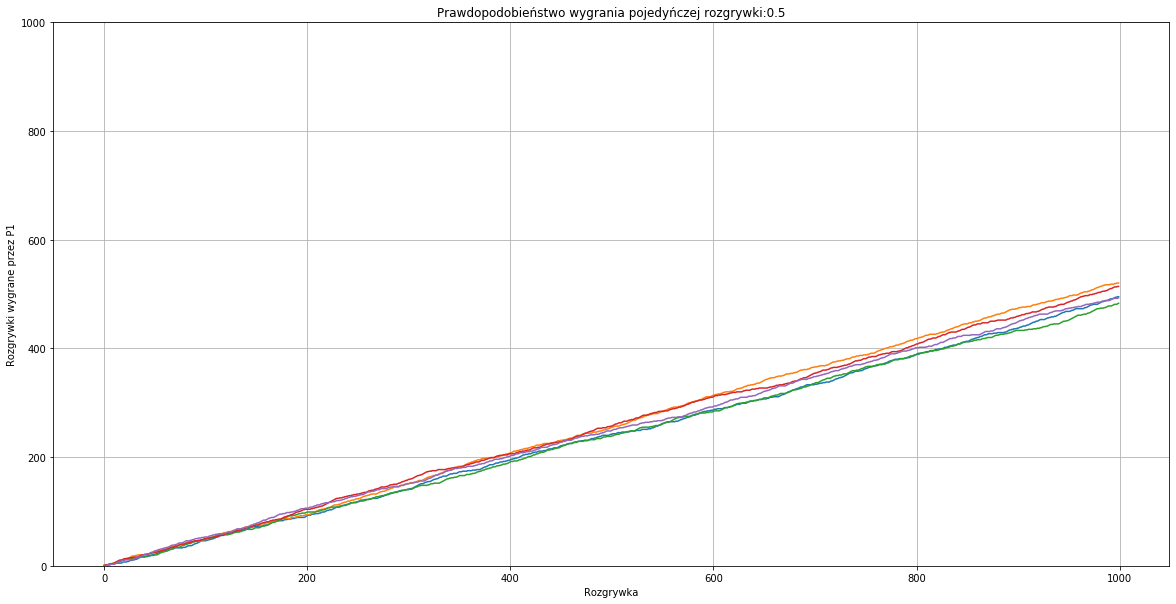

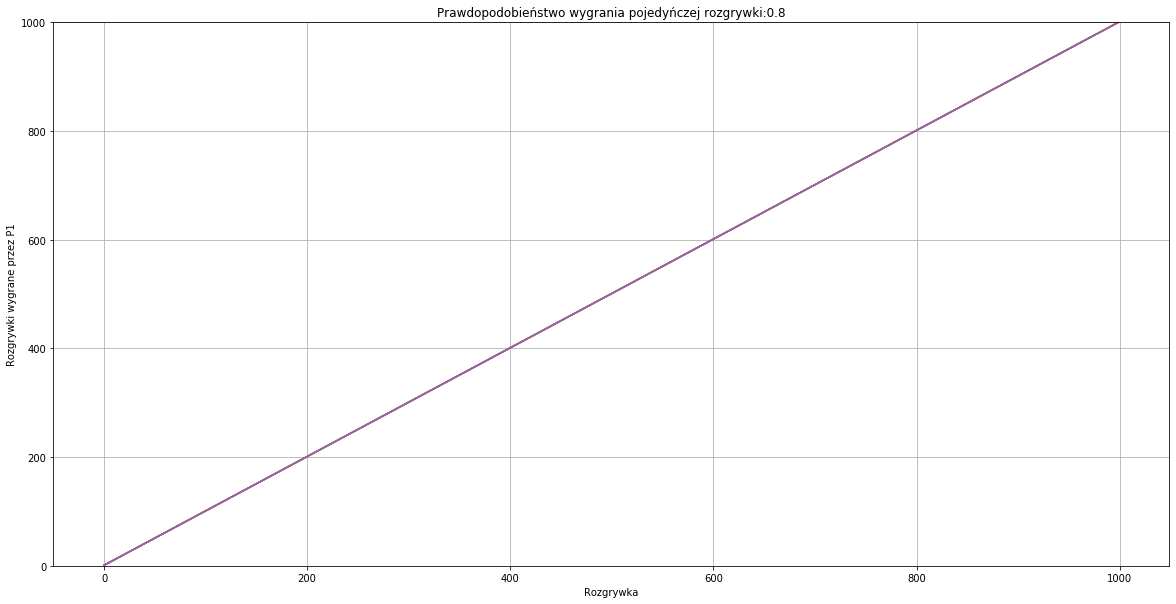

In [13]:
games = 1000
n_simulations = 5
prob = (0.2, 0.5, 0.8)

for i in prob:
    for s in range(n_simulations):
        p1_wins, counter = players_ruin_with_wins(50, 50, i, games, 1)
        plt.plot(range(games), cumsum(p1_wins))
    
    plt.grid()
    plt.ylim(0, games)
    plt.title('Prawdopodobieństwo wygrania rozgrywki:'+ str(i))
    plt.xlabel('Rozgrywka')
    plt.ylabel('Rozgrywki wygrane przez P1')
    
    plt.show()

### Trajektoria kapitalu dla 1 z 2 graczy

In [14]:
def players_ruins_with_balance(p1_balance, p2_balance, prob, bet = 1):
    counter = 0
    p1_wins_array = []
    p1_balance_array = []
    
    while p1_balance > 0 and p2_balance > 0:
        p1_win = random.uniform(0, 1) < prob
        p1_balance_array.append(p1_balance)
        
        if p1_win:
            p1_balance = p1_balance + bet
            p2_balance = p2_balance - bet
        else:
            p1_balance = p1_balance - bet
            p2_balance = p2_balance + bet
        
        p1_wins_array.append(p1_win)
        counter += 1
        
    p1_balance_array.append(p1_balance)
    return p1_wins, counter, p1_balance_array

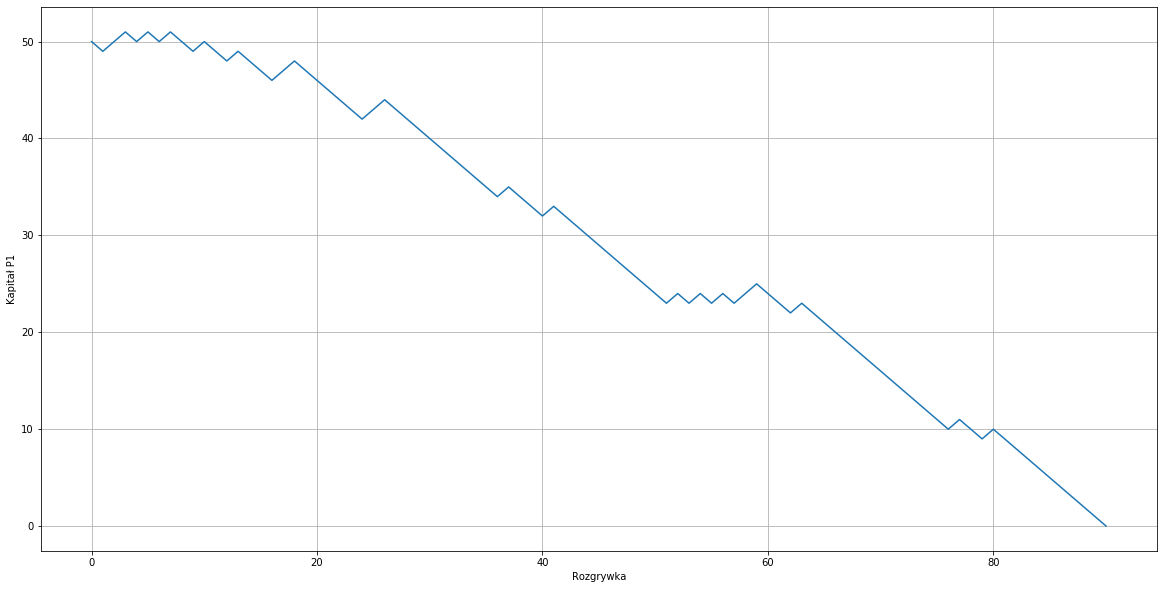

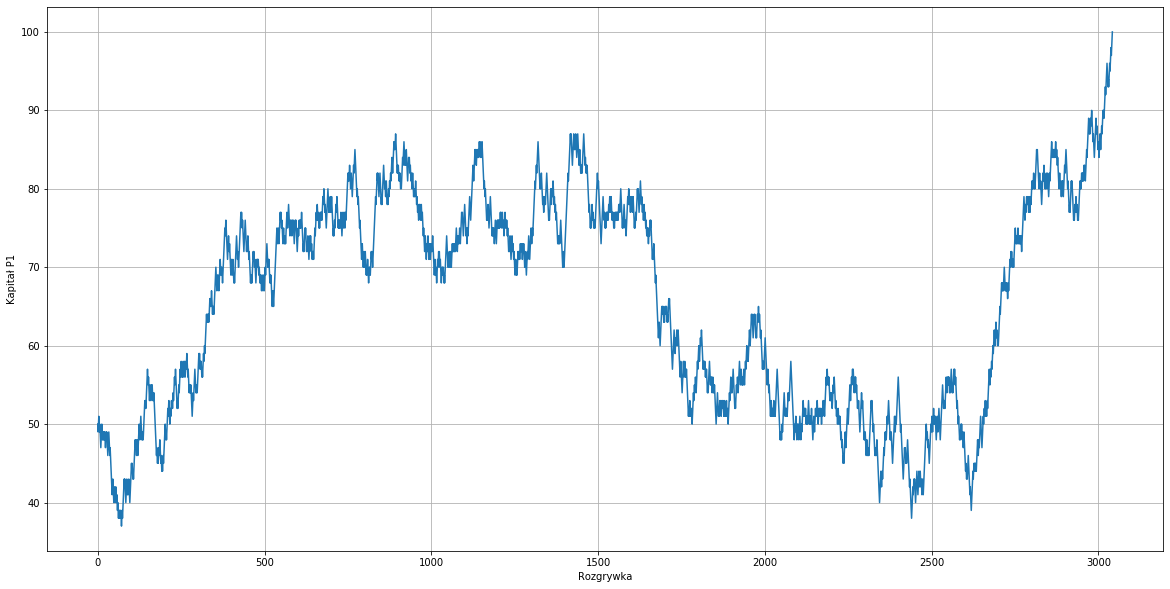

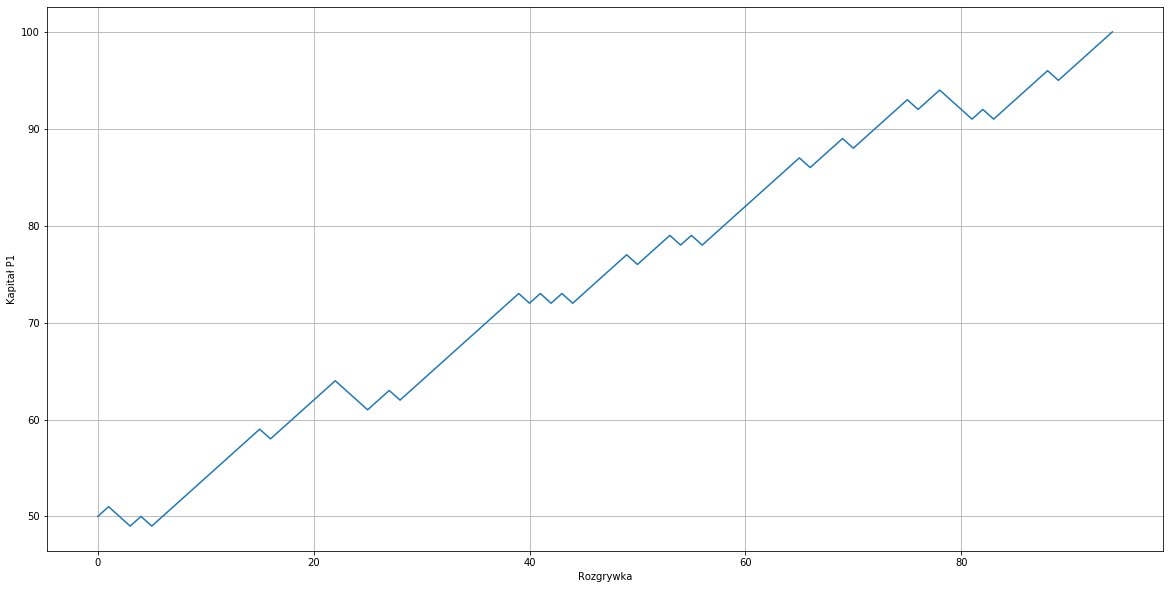

In [15]:
prob = (0.2, 0.5, 0.8)
number_of_simulations = 1 

for i in prob:
    for s in range(number_of_simulations):
        p1_wins, games, p1_balances = players_ruins_with_balance(50, 50, i)
        plt.plot(range(games + 1), p1_balances)
       
    plt.rcParams["figure.figsize"]=(20, 10)
    plt.grid()
    plt.xlabel('Rozgrywka')
    plt.ylabel('Kapitał P1')
    plt.show()